# **<font color=white> 07.Spectral Clustering Code 실습**

[목적]
  - 비지도학습 중 하나인 Clustering 중 Spectral Clustering 실습
  - ForLoop 활용 K의 Range를 변경 시켜가며 실습 진행
  - Clustering은 기본적으로 Data가 많을 때 시간이 굉장히 오래걸림
     - Distance Matrix를 만들고 행렬 계산을 하는 알고리즘이 많기 때문

[Process]
  1. Define X's
  2. Modeling

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Data Loading (수술 時 사망 데이터)
data=pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
# Data Checking
col = []
missing = []
level = [] 
for name in data.columns:
    
    # Missing
    missper = data[name].isnull().sum() / data.shape[0]
    missing.append(round(missper, 4))

    # Leveling
    lel = data[name].dropna()
    level.append(len(list(set(lel))))

    # Columns
    col.append(name)

summary = pd.concat([pd.DataFrame(col, columns=['name']), 
                     pd.DataFrame(missing, columns=['Missing Percentage']), 
                     pd.DataFrame(level, columns=['Level'])], axis=1)


In [4]:
drop_col = summary['name'][(summary['Level'] <= 1) | (summary['Missing Percentage'] >= 0.8)]
data.drop(columns=drop_col, inplace=True)
print(">>>> Data Shape : {}".format(data.shape))

>>>> Data Shape : (532, 22)


In [5]:
# X's & Y Split
Y = data['censor']
X = data.drop(columns=['censor'])

[Clustering 전 Scaling]
  - Clustering은 Distance를 구하는 작업이 필요함
  - Feature들의 Scale이 다르면 Distance를 구하는데 가중치가 들어가게 됨
  - 따라서, Distance 기반의 Clustering의 경우 Scaling이 필수

In [6]:
# Scaling
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

[차원축소]
  - Clustering의 결과를 확인하기 위하여 차원 축소 진행
  - 다음 Chapter에서 차원축소에 대해 자세히 설명할 예정

In [7]:
X_scal.shape

(532, 21)

In [8]:
pca = PCA(n_components=2).fit(X)
X_PCA = pca.fit_transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
print(">>>> PCA Variance : {}".format(pca.explained_variance_ratio_))

>>>> PCA Variance : [0.45933235 0.26652713]


[Spectral Clustering]
  - Hyperparameter Tuning using for Loop

[Spectral Clustering Parameters]
  - Package : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
  - n_clusters : Cluster 개수 (K)
  - affinity : 유사도 행렬 만드는 방법
    - ‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors.
    - ‘rbf’: construct the affinity matrix using a radial basis function (RBF) kernel.
       - Gaussian Kernel
    - ‘precomputed’: interpret X as a precomputed affinity matrix, where larger values indicate greater similarity between instances.
    - ‘precomputed_nearest_neighbors’: interpret X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance.
  - n_neighbors : 유사도 계산시 주변 n개를 보고 판단할 것 인지
    - Number of neighbors to use when constructing the affinity matrix using the nearest neighbors method. Ignored for affinity='rbf'

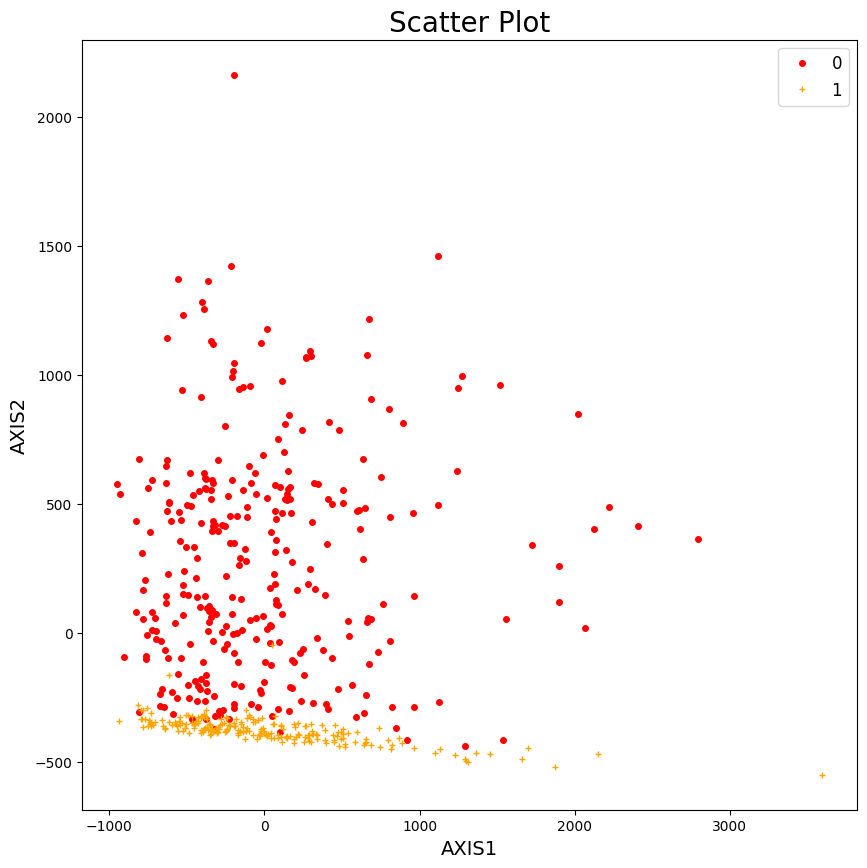

---------------------------------------------------------------------------------------------------


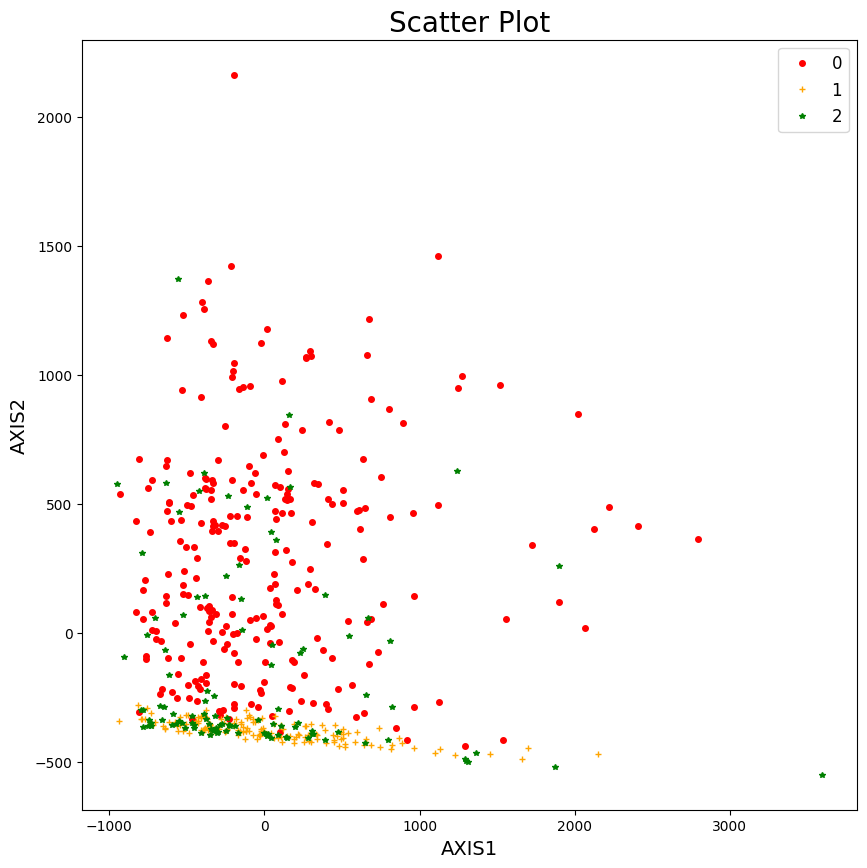

---------------------------------------------------------------------------------------------------


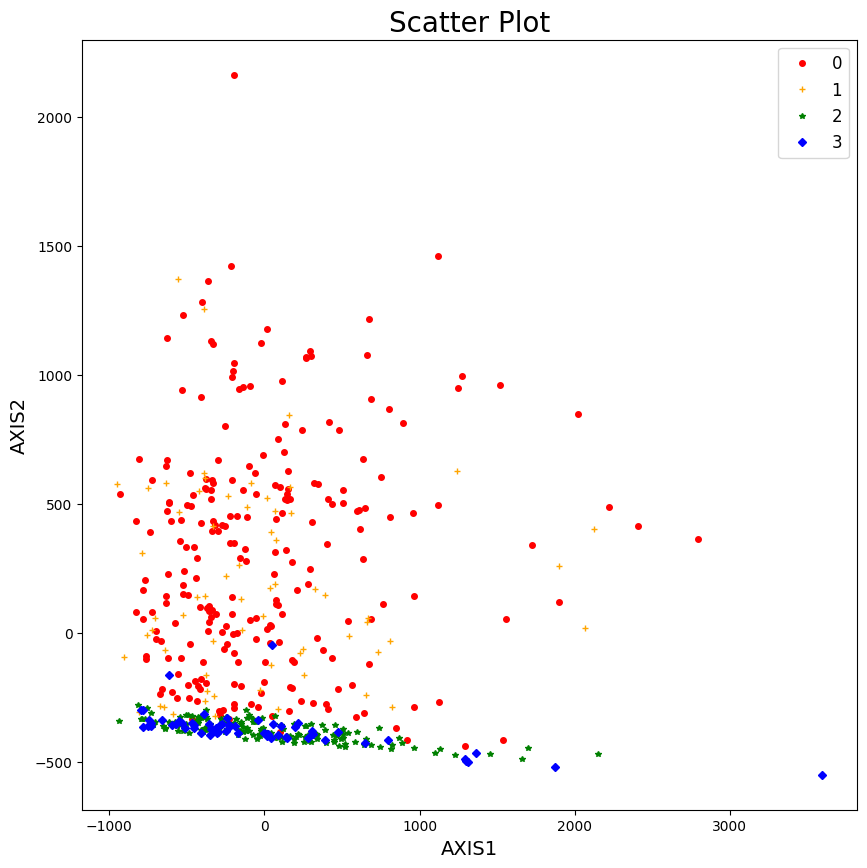

---------------------------------------------------------------------------------------------------


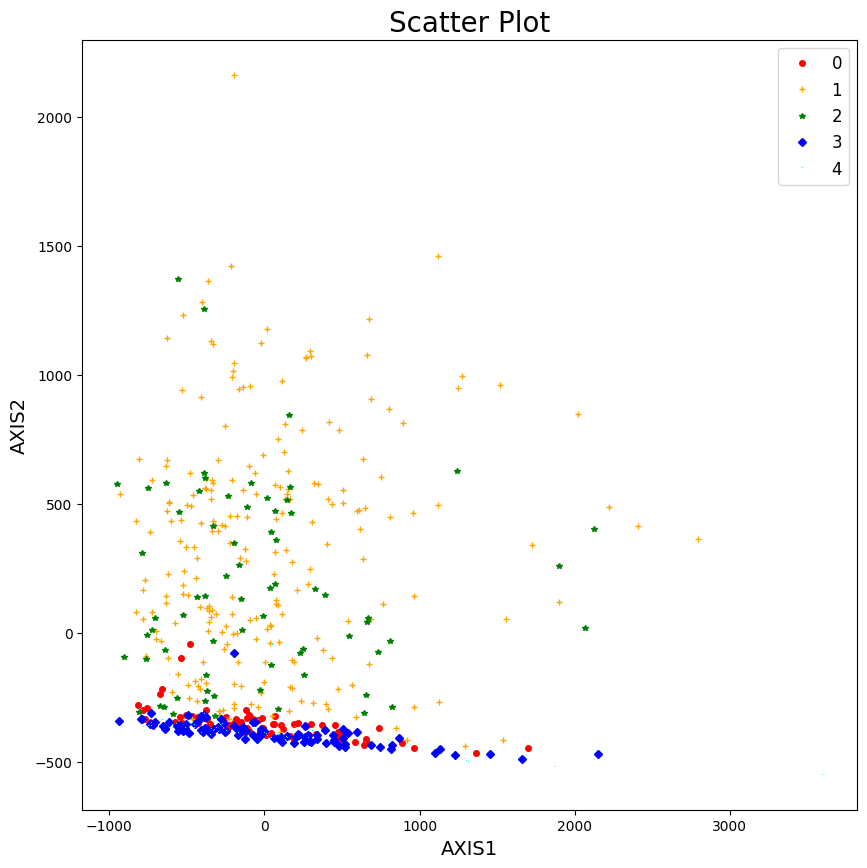

---------------------------------------------------------------------------------------------------


In [9]:
# Spectral Clustering Modeling
for cluster in list(range(2, 6)):
    Cluster = SpectralClustering(n_clusters=cluster).fit(X_scal)
    labels = Cluster.labels_

    # label Add to DataFrame
    data['{} label'.format(cluster)] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    # Plot Data Setting
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

    mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
    colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yellow', 'grey', 'orchid', 'lightpink']

    fig, ax = plt.subplots(figsize=(10,10))
    for j, (name, group) in enumerate(groups):
        ax.plot(group['AXIS1'], 
                group['AXIS2'], 
                marker=mar[j],
                linestyle='',
                label=name,
                c = colo[j],
                ms=4)
        ax.legend(fontsize=12, loc='upper right') # legend position
    plt.title('Scatter Plot', fontsize=20)
    plt.xlabel('AXIS1', fontsize=14)
    plt.ylabel('AXIS2', fontsize=14)
    plt.show()
    print("---------------------------------------------------------------------------------------------------")

    gc.collect()

In [10]:
data

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,cd40,cd420,cd496,r,cd80,cd820,2 label,3 label,4 label,5 label
0,0,1090,43,66.679,0,1,0,100,0,1,...,504,353,660,1,870,782,0,0,0,1
1,1,794,31,73.030,0,1,0,100,0,1,...,244,225,106,1,708,699,0,0,0,1
2,0,957,41,66.226,0,1,1,100,0,1,...,401,366,453,1,889,720,0,0,0,1
3,1,188,35,78.019,0,1,0,100,0,1,...,221,132,-1,0,221,759,0,0,0,1
4,1,308,40,83.009,0,1,0,100,0,1,...,150,90,20,1,1730,1160,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,1097,24,71.000,1,0,0,100,0,1,...,364,475,734,1,770,802,0,0,0,1
528,1,154,21,52.300,1,0,0,90,0,1,...,415,181,84,1,949,666,0,0,0,1
529,1,588,16,63.000,1,0,0,100,0,1,...,299,214,124,1,546,471,0,0,0,1
530,0,395,17,102.967,1,0,0,100,0,1,...,373,218,-1,0,1759,1030,0,0,1,2


In [11]:
# Confusion Matrix 확인
cm = confusion_matrix(data['censor'], data['2 label'])
print(cm)

[[185 166]
 [122  59]]


In [12]:
# ACC & F1-Score
print("TesT Acc : {}".format((cm[0,0] + cm[1,1])/cm.sum()))
print("F1-Score : {}".format(f1_score(data['censor'], data['2 label'])))

TesT Acc : 0.45864661654135336
F1-Score : 0.29064039408866993
